# MNIST DATASET


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.callbacks import CSVLogger, ModelCheckpoint, TensorBoard
from keras.datasets import mnist
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from keras.losses import SparseCategoricalCrossentropy
from keras.metrics import SparseCategoricalAccuracy
from keras.models import Sequential
from keras.optimizers.legacy import Adam

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

MNIST stands for Modified National Institute of Standards and Technology, which is a dataset of handwritten digits used for training and testing image processing systems.


The MNIST dataset is a collection of 70,000 handwritten digits (0-9) images, with 60,000 images for training and 10,000 images for testing. Each image is a 28x28 grayscale image, and the goal is to correctly classify each image into its corresponding digit class. The MNIST dataset is commonly used as a benchmark dataset for image classification tasks in machine learning and computer vision.


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
y_test.shape

(10000,)

In [7]:
class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

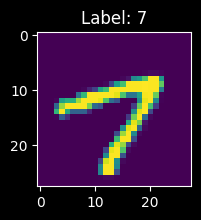

In [8]:
def plot_sample(index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X_train[index])
    plt.title("Label: {}".format(class_names[y_train[index]]))


plot_sample(101)

In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## ANN


In [10]:
ann = Sequential(
    layers=[
        Flatten(input_shape=(28, 28), name="input_layer"),
        Dense(128, activation="relu", name="hidden_layer_1"),
        Dense(10, activation="softmax", name="output_layer"),
    ],
    name="ann",
)

2023-08-11 17:03:35.616806: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-08-11 17:03:35.616879: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-08-11 17:03:35.616908: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-08-11 17:03:35.617074: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-11 17:03:35.617311: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
ann.layers

In [12]:
ann.summary()

Model: "ann"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 hidden_layer_1 (Dense)      (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
optimizer = Adam()
epochs = 5
ann.compile(
    optimizer=optimizer,
    loss=SparseCategoricalCrossentropy(),
    metrics=[SparseCategoricalAccuracy()],
)

In [14]:
ann_checkpoint_callback = ModelCheckpoint(
    filepath="../Models/mnist_ann",
    monitor="val_accuracy",
    save_best_only=True,
)
ann_tensorboard_callback = TensorBoard(
    log_dir="../Logs/mnist_ann_logs", histogram_freq=1, write_images=True
)
ann_csvlogger_callback = CSVLogger("../Logs/mnist_ann_logs.csv")
ann_history = ann.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=epochs,
    validation_split=0.2,
    callbacks=[
        ann_checkpoint_callback,
        ann_tensorboard_callback,
        ann_csvlogger_callback,
    ],
)

Epoch 1/5


2023-08-11 17:03:36.510405: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


742/750 [============================>.] - ETA: 0s - loss: 0.4041 - sparse_categorical_accuracy: 0.8860

2023-08-11 17:03:41.723076: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


750/750 [==============================] - 7s 8ms/step - loss: 0.4022 - sparse_categorical_accuracy: 0.8867 - val_loss: 0.2911 - val_sparse_categorical_accuracy: 0.9161
Epoch 2/5
750/750 [==============================] - 6s 8ms/step - loss: 0.3039 - sparse_categorical_accuracy: 0.9149 - val_loss: 0.2918 - val_sparse_categorical_accuracy: 0.9183
Epoch 3/5
750/750 [==============================] - 6s 8ms/step - loss: 0.2970 - sparse_categorical_accuracy: 0.9174 - val_loss: 0.2981 - val_sparse_categorical_accuracy: 0.9164
Epoch 4/5
750/750 [==============================] - 5s 7ms/step - loss: 0.2950 - sparse_categorical_accuracy: 0.9171 - val_loss: 0.2874 - val_sparse_categorical_accuracy: 0.9209
Epoch 5/5
750/750 [==============================] - 5s 7ms/step - loss: 0.2970 - sparse_categorical_accuracy: 0.9178 - val_loss: 0.2991 - val_sparse_categorical_accuracy: 0.9183


In [15]:
ann_train_loss = ann_history.history["loss"]
ann_train_acc = ann_history.history["sparse_categorical_accuracy"]
ann_val_loss = ann_history.history["val_loss"]
ann_val_acc = ann_history.history["val_sparse_categorical_accuracy"]


print("Training loss:", np.mean(ann_train_loss))
print("Validation loss:", np.mean(ann_val_loss))
print(
    "%f Training accuracy with a standard deviation of %f"
    % (np.mean(ann_train_acc), np.std(ann_train_acc))
)
print(
    "%f Validation accuracy with a standard deviation of %f"
    % (np.mean(ann_val_acc), np.std(ann_val_acc))
)

Training loss: 0.31902840733528137
Validation loss: 0.2935151278972626
0.910767 Training accuracy with a standard deviation of 0.012091
0.918017 Validation accuracy with a standard deviation of 0.001727


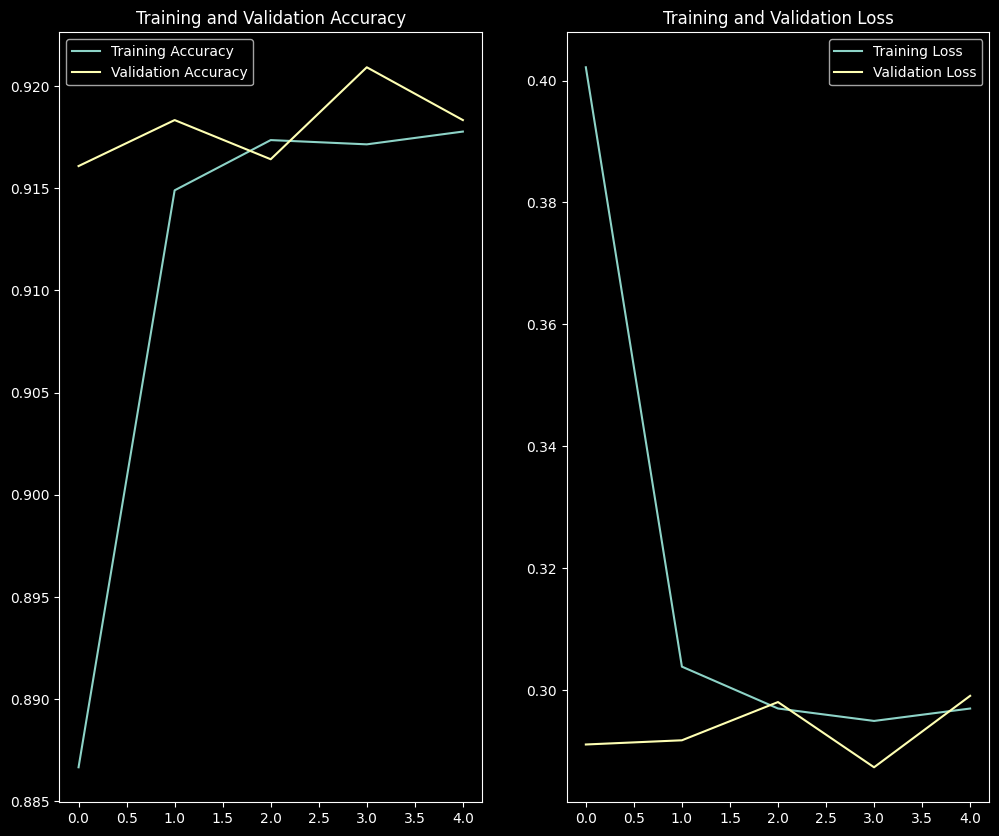

In [16]:
epochs_range = range(epochs)

# Plot the training and validation accuracy
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, ann_train_acc, label="Training Accuracy")
plt.plot(epochs_range, ann_val_acc, label="Validation Accuracy")
plt.legend(loc="best")
plt.title("Training and Validation Accuracy")

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, ann_train_loss, label="Training Loss")
plt.plot(epochs_range, ann_val_loss, label="Validation Loss")
plt.legend(loc="best")
plt.title("Training and Validation Loss")

plt.savefig("../Images/mnist_ann_acc_loss.png", bbox_inches="tight")

In [17]:
ann_test_loss, ann_test_accuracy = ann.evaluate(X_test, y_test)
print("Test loss:", ann_test_loss)
print("Test accuracy:", ann_test_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.3041 - sparse_categorical_accuracy: 0.9189
Test loss: 0.30407723784446716
Test accuracy: 0.9189000129699707


In [18]:
y_pred = ann.predict(X_test)

 87/313 [=======>......................] - ETA: 0s

2023-08-11 17:04:07.989951: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


## CNN


In [19]:
cnn = Sequential(
    layers=[
        Conv2D(
            filters=32,
            kernel_size=3,
            activation="relu",
            padding="same",
            strides=1,
            input_shape=(28, 28, 1),
            name="conv_layer_1",
        ),
        MaxPooling2D(pool_size=2, strides=2, name="pooling_layer_1"),
        Conv2D(
            filters=64,
            kernel_size=3,
            activation="relu",
            padding="same",
            strides=1,
            name="conv_layer_2",
        ),
        MaxPooling2D(pool_size=2, strides=2, name="pooling_layer_2"),
        Flatten(name="flatten_layer"),
        Dense(128, activation="relu", name="dense_layer_1"),
        Dense(10, activation="softmax", name="final_layer"),
    ],
    name="cnn",
)

In [20]:
cnn.layers

In [21]:
cnn.summary()

Model: "cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_layer_1 (Conv2D)       (None, 28, 28, 32)        320       
                                                                 
 pooling_layer_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv_layer_2 (Conv2D)       (None, 14, 14, 64)        18496     
                                                                 
 pooling_layer_2 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_layer (Flatten)     (None, 3136)              0         
                                                                 
 dense_layer_1 (Dense)       (None, 128)               401536  

In [22]:
cnn.compile(
    optimizer=optimizer,
    loss=SparseCategoricalCrossentropy(),
    metrics=[SparseCategoricalAccuracy()],
)

In [23]:
cnn_checkpoint_callback = ModelCheckpoint(
    filepath="../Models/mnist_cnn",
    monitor="val_accuracy",
    save_best_only=True,
)
cnn_tensorboard_callback = TensorBoard(
    log_dir="../Logs/mnist_cnn_logs", histogram_freq=1, write_images=True
)
cnn_csvlogger_callback = CSVLogger("../Logs/mnist_cnn_logs.csv")

cnn_history = cnn.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=epochs,
    validation_split=0.2,
    callbacks=[
        cnn_checkpoint_callback,
        cnn_tensorboard_callback,
        cnn_csvlogger_callback,
    ],
)

Epoch 1/5


2023-08-11 17:04:09.343219: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


750/750 [==============================] - ETA: 0s - loss: 0.1177 - sparse_categorical_accuracy: 0.9631

2023-08-11 17:04:19.322329: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


750/750 [==============================] - 12s 15ms/step - loss: 0.1177 - sparse_categorical_accuracy: 0.9631 - val_loss: 0.0564 - val_sparse_categorical_accuracy: 0.9827
Epoch 2/5
750/750 [==============================] - 11s 15ms/step - loss: 0.0463 - sparse_categorical_accuracy: 0.9861 - val_loss: 0.0523 - val_sparse_categorical_accuracy: 0.9861
Epoch 3/5
750/750 [==============================] - 11s 14ms/step - loss: 0.0393 - sparse_categorical_accuracy: 0.9888 - val_loss: 0.0474 - val_sparse_categorical_accuracy: 0.9880
Epoch 4/5
750/750 [==============================] - 11s 14ms/step - loss: 0.0381 - sparse_categorical_accuracy: 0.9897 - val_loss: 0.0631 - val_sparse_categorical_accuracy: 0.9872
Epoch 5/5
750/750 [==============================] - 11s 15ms/step - loss: 0.0440 - sparse_categorical_accuracy: 0.9899 - val_loss: 0.1238 - val_sparse_categorical_accuracy: 0.9818


In [24]:
cnn_train_loss = cnn_history.history["loss"]
cnn_train_acc = cnn_history.history["sparse_categorical_accuracy"]
cnn_val_loss = cnn_history.history["val_loss"]
cnn_val_acc = cnn_history.history["val_sparse_categorical_accuracy"]


print("Training loss:", np.mean(cnn_train_loss))
print("Validation loss:", np.mean(cnn_val_loss))
print(
    "%f Training accuracy with a standard deviation of %f"
    % (np.mean(cnn_train_acc), np.std(cnn_train_acc))
)
print(
    "%f Validation accuracy with a standard deviation of %f"
    % (np.mean(cnn_val_acc), np.std(cnn_val_acc))
)

Training loss: 0.057093999534845355
Validation loss: 0.0686065599322319
0.983496 Training accuracy with a standard deviation of 0.010275
0.985167 Validation accuracy with a standard deviation of 0.002479


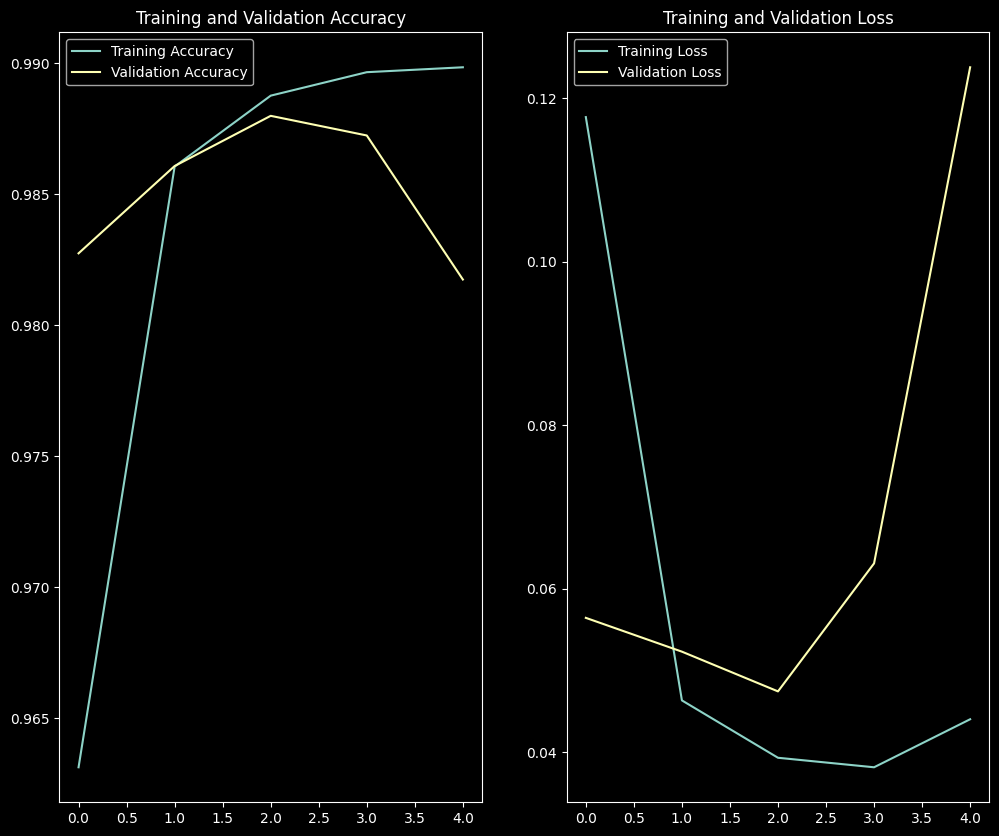

In [25]:
epochs_range = range(epochs)

# Plot the training and validation accuracy
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, cnn_train_acc, label="Training Accuracy")
plt.plot(epochs_range, cnn_val_acc, label="Validation Accuracy")
plt.legend(loc="best")
plt.title("Training and Validation Accuracy")

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, cnn_train_loss, label="Training Loss")
plt.plot(epochs_range, cnn_val_loss, label="Validation Loss")
plt.legend(loc="best")
plt.title("Training and Validation Loss")

plt.savefig("../Images/mnist_cnn_acc_loss.png", bbox_inches="tight")

In [26]:
cnn_test_loss, cnn_test_accuracy = cnn.evaluate(X_test, y_test)
print("Test loss:", cnn_test_loss)
print("Test accuracy:", cnn_test_accuracy)

313/313 [==============================] - 2s 6ms/step - loss: 0.0938 - sparse_categorical_accuracy: 0.9843
Test loss: 0.09382917732000351
Test accuracy: 0.9843000173568726


In [27]:
y_pred = cnn.predict(X_test)

 57/313 [====>.........................] - ETA: 0s

2023-08-11 17:05:06.626009: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 3ms/step
